In [100]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline 

import seaborn as sns

In [101]:
import os
import pandas as pd
import numpy as np

from utils.datatools import *

In [102]:
PHASEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE/"
SAVEPATH = "/Users/sujinlee/desktop/git_repositories/nims_pd/dataset_LHEE_RHEE_Z_PHASE_STD/"
CONTROL_PATH = os.path.join(SAVEPATH, "Controls")
PD_PATH = os.path.join(SAVEPATH, "PD")

if os.path.exists(SAVEPATH) == False: os.mkdir(SAVEPATH)
if os.path.exists(CONTROL_PATH) == False: os.mkdir(CONTROL_PATH)
if os.path.exists(PD_PATH) == False: os.mkdir(PD_PATH)

In [103]:
patients = getPatientsTable()
# patients.head()

In [104]:
CONTROL = patients[patients["Category"] == "Controls"]
PD = patients[patients["Category"] == "PD"]

In [105]:
print("Controls count:", len(CONTROL))
print("PD count:", len(PD))

Controls count: 22
PD count: 83


----

---

In [112]:
TARGET_CATE = "Controls"
# TARGET_PATIENT_INITIAL = CONTROL.iloc[0]["Patient"]
TARGET_PATIENT_INITIAL = 'BHY'

print("Target Category:", TARGET_CATE)
print("Target Patient Initial:", TARGET_PATIENT_INITIAL)

Target Category: Controls
Target Patient Initial: BHY


In [113]:
FWdata = [
    pd.read_csv(os.path.join(CONTROL_PATH, f"LHEE_{TARGET_PATIENT_INITIAL}_FW1.csv")),
    pd.read_csv(os.path.join(CONTROL_PATH, f"LHEE_{TARGET_PATIENT_INITIAL}_FW2.csv")),
    pd.read_csv(os.path.join(CONTROL_PATH, f"LHEE_{TARGET_PATIENT_INITIAL}_FW3.csv"))
]

In [114]:
data = FWdata[0]

In [115]:
data.head()

,Frame,Sub Frame,LFHD_X,LFHD_Y,LFHD_Z,RFHD_X,RFHD_Y,RFHD_Z,LBHD_X,LBHD_Y,...,RANK_Z,RHEE_X,RHEE_Y,RHEE_Z,RTOE_X,RTOE_Y,RTOE_Z,LHEE_Z_DIFF,RHEE_Z_DIFF,PHASE
0,221,0,-9.741241,-111.799255,1424.895260,108.027420,-102.403381,1426.895992,-0.732052,-265.673584,...,50.600949,109.186127,-529.515015,56.489437,125.582356,-369.876709,3.896324,0.459619,4.208320,1.0
1,222,0,-12.293693,-101.213745,1424.584225,106.585098,-91.755066,1426.038449,-3.319427,-254.874878,...,53.662914,110.538220,-527.067017,61.267315,125.939396,-368.852661,3.957730,2.050236,4.777878,1.0
2,223,0,-13.797455,-90.792175,1424.482052,104.360493,-81.606323,1425.962887,-5.077759,-244.445923,...,57.472462,111.636173,-523.746216,66.615109,126.431370,-367.643799,3.855927,1.927330,5.347794,1.0
3,224,0,-16.506668,-79.905518,1424.734005,102.825966,-70.997986,1426.216305,-6.748115,-234.018310,...,61.031948,112.315693,-520.093384,72.199024,126.945019,-366.282349,3.456181,1.548157,5.583915,1.0
4,225,0,-18.254963,-69.434936,1424.806759,100.508347,-60.685303,1426.838009,-9.244484,-223.194214,...,65.392147,112.555264,-515.267700,78.804188,128.051594,-364.770264,2.585190,1.238060,6.605164,1.0


In [116]:
# row 0
data.iloc[0]["LHEE_X"], data.iloc[0]["LHEE_Y"], data.iloc[0]["LHEE_Z"]

(0.0, 0.0, 0.0)

In [117]:
# row 1
data.iloc[1]["LHEE_X"], data.iloc[1]["LHEE_Y"], data.iloc[1]["LHEE_Z"]

(0.8659099999999995, 2.969970999999987, 2.050235999999998)

<AxesSubplot:>

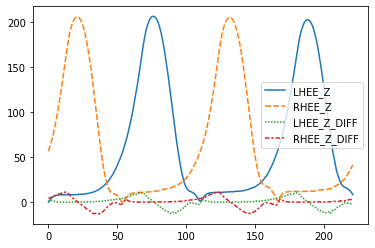

In [118]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z", "LHEE_Z_DIFF", "RHEE_Z_DIFF"]])

<AxesSubplot:>

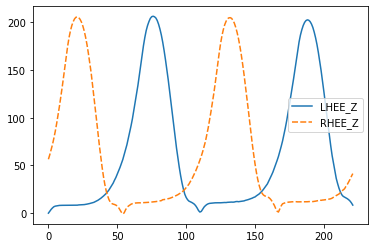

In [119]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z"]])

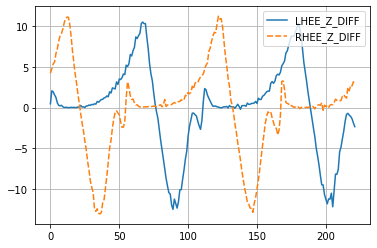

In [120]:
sns.lineplot(data=data[["LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
plt.grid()

In [121]:
np.where(data["PHASE"] == 1)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         14,  15,  16,  17,  19,  20,  21,  55,  56,  57,  58,  59,  60,
         61,  62,  63,  64,  65,  67,  68,  69,  70,  71,  72,  73,  74,
         75,  76, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
        122, 125, 126, 127, 128, 130, 131, 132, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187,
        188]),)

In [122]:
start = [np.where(data["PHASE"] == 1)[0][0]] + [ x for idx, x in enumerate(np.where(data["PHASE"] == 1)[0][1:]) if x -np.where(data["PHASE"] == 1)[0][idx] > 5 ]
start

[0, 55, 111, 168]

In [123]:
for f in start:
    print()
    print(data.iloc[f][["LHEE_Z", "RHEE_Z"]])


LHEE_Z     0.000000
RHEE_Z    56.489437
Name: 0, dtype: float64

LHEE_Z    61.376835
RHEE_Z     0.292856
Name: 55, dtype: float64

LHEE_Z     1.830004
RHEE_Z    59.695736
Name: 111, dtype: float64

LHEE_Z    64.468479
RHEE_Z     4.352692
Name: 168, dtype: float64


## 3) Z left-right

### 1- LHEE Standardized values

<AxesSubplot:>

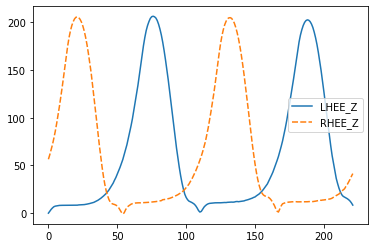

In [124]:
sns.lineplot(data=data[["LHEE_Z", "RHEE_Z"]])

<AxesSubplot:>

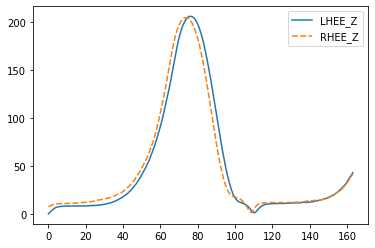

In [125]:
sns.lineplot(data=pd.DataFrame({
            "LHEE_Z" : data.iloc[0:-(start[1]+3)]["LHEE_Z"].values,
            "RHEE_Z" : data.iloc[start[1]+3:]["RHEE_Z"].values})
            )

### 2- Vector

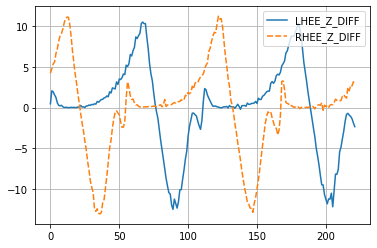

In [126]:
sns.lineplot(data=data[["LHEE_Z_DIFF", "RHEE_Z_DIFF"]])
plt.grid()

<AxesSubplot:>

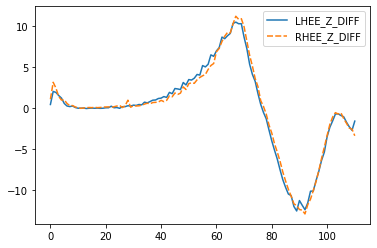

In [127]:
sns.lineplot(data=pd.DataFrame({
            "LHEE_Z_DIFF" : data.iloc[0:start[2]]["LHEE_Z_DIFF"].values,
            "RHEE_Z_DIFF" : data.iloc[start[1]:start[1]+start[2]]["RHEE_Z_DIFF"].values})
            )

## 4) x-y 

In [128]:
# 2d x-y 그리기 
def plot2Dxy(mark, data):
    plt.plot(data[mark+"_X"], data[mark+"_Y"])
    plt.title(mark)
    plt.xlabel("X")
    plt.ylabel("Y")

    return plt

In [129]:
# 2D x-y trial 겹쳐 그리기
def plot2Dxytrials(mark, dataList, patient_initial):
    if len(dataList) == 2:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g')
    if len(dataList) == 3:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g',
                 FWdata[2][mark+"_X"], FWdata[2][mark+"_Y"], 'b')
    plt.title(patient_initial + " " + mark)
    plt.xlabel("X")
    plt.ylabel("Y")    
    plt.show()

<module 'matplotlib.pyplot' from '/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/matplotlib/pyplot.py'>

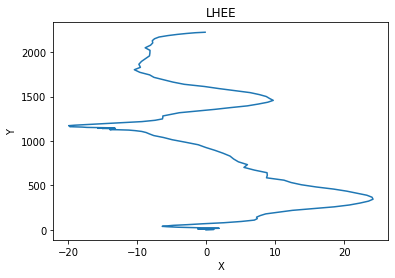

In [130]:
plot2Dxy("LHEE", data)

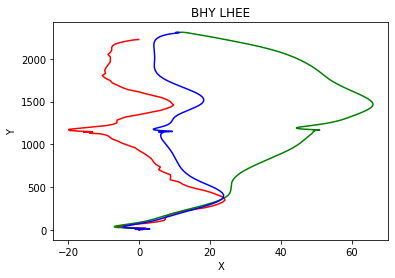

In [131]:
plot2Dxytrials("LHEE", FWdata, TARGET_PATIENT_INITIAL)